In [1]:
import numpy as np
import matplotlib.pyplot as plt

The mathematical equation in differential form:
$$ f(x) = \frac{dx}{dt} = -x $$
#### Analytical solution:
$$ x = x_0 exp(-t) $$
### Numerical Solutions 
#### Explicit scheme
Here, $$ \frac{dx}{dt} = f(x_t) $$
So, $$ x_{t+1} = x_{t}(1 - \Delta t) $$
#### Implicit scheme
Here, $$ \frac{dx}{dt} = f(x_{t+1}) $$
So, $$ x_{t+1} = \frac{x_{t}}{1 + \Delta t} $$
#### Explicit Heun (Explicit Predictor Corrector)
Calculate the slope by taking average of the slope at points $x_t$ and $\tilde x_{t+1}$:

$$\frac{dx}{dt} = \frac{f(x_{t}) + f(\tilde x_{t+1})}{2}$$

So, $x_{t+1}$ becomes,
$$ x_{t+1} = x_{t} + \Delta t \frac{ f(x_{t}) + f(\tilde x_{t+1}) }{2} $$


#### Implicit Heun (Implicit Predictor Corrector)
$$\frac{dx}{dt} = \frac{x_{t+1} - x_{t}}{\Delta t} = \frac{f(x_{t}) + f(x_{t+1})}{2}$$

$$\implies \frac{x_{t+1} - x_{t}}{\Delta t} = \frac{-x_t + -x_{t+1}}{2} $$
On simplifying,
$$x_{t+1} = x_t\frac{2 - \Delta t}{2 + \Delta t}$$


In [2]:
dt = 0.3
end_time = 20
x_0 = 10.0
t_array = np.arange(0, end_time, dt)
timesteps = np.size(t_array)

In [3]:
def get_dx_dt(x):
    return -x

In [4]:
x_exp = np.zeros(timesteps)
x_exp[0] = x_0
x_imp = np.copy(x_exp)
x_pc_exp = np.copy(x_exp)
x_pc_imp = np.copy(x_exp)

for t in range(timesteps-1):
    x_exp[t+1] = x_exp[t]*(1 - dt) # explicit scheme
    x_imp[t+1] = x_imp[t]/(1 + dt) # implicit scheme
    
    # explicit Heun
    x_tilde = x_pc_exp[t] + dt*get_dx_dt(x_pc_exp[t])
    x_pc_exp[t+1] = x_pc_exp[t] + dt*0.5*( get_dx_dt(x_pc_exp[t]) + get_dx_dt(x_tilde) )
    # implicit Heun
    x_pc_imp[t+1] = x_pc_imp[t]*(2 - dt)/(2 + dt)

### Plotting

<IPython.core.display.Javascript object>


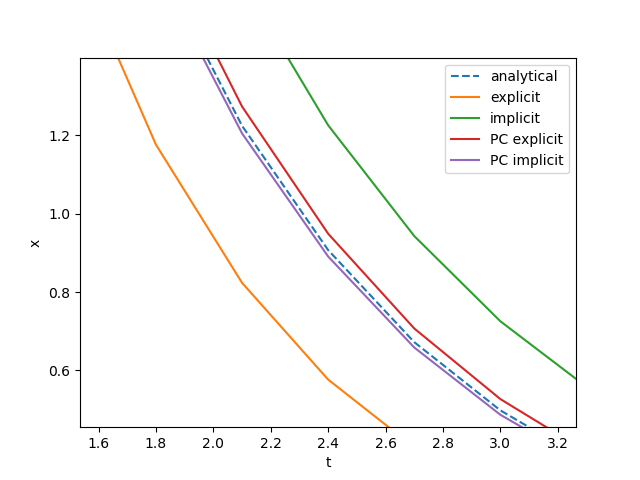

In [5]:
# to make plotting interactive: use %matplotlib notebook (but only 1 interactive window can be open at any time)
%matplotlib notebook
x_ana = x_0*np.exp(-t_array)
plt.plot(t_array, x_ana, '--', label='analytical')
plt.plot(t_array, x_exp, label='explicit')
plt.plot(t_array, x_imp, label='implicit')
plt.plot(t_array, x_pc_exp, label='PC explicit')
plt.plot(t_array, x_pc_imp, label='PC implicit')
plt.xlabel('t')
plt.ylabel('x')

plt.legend()
plt.show()